In [1]:
import os
import numpy as np

from shapely import geometry, affinity
from matplotlib import pyplot as plt

import PIL.Image
from IPython.display import display

In [2]:
img = PIL.Image.open('image_based/sc2.png')
print(img.size)

center = np.array(img.size) / 2
x, y = center
x -= 1
y -= 10
dx = dy = 180
bbox = [x-dx, y-dy, x+dx, y+dy]
img = img.crop(bbox)

(1920, 1080)


In [3]:
def parse_img(name, count=36):
    img = PIL.Image.open(name)
#     print(img.size)

    center = np.array(img.size) / 2
    x, y = center
    x -= 1
    y -= 10
    dx = dy = 180
    bbox = [x-dx, y-dy, x+dx, y+dy]
    img = img.crop(bbox)
    
    result = generate_transform(img, [100, 180], count)
#     result = result.crop((0, 20, 1000, 40))
    display(result)
    return result

ends = [
    parse_img('image_based/end.png'),
    parse_img('image_based/end2.png'),
    parse_img('image_based/end3.png')
]

NameError: name 'generate_transform' is not defined

In [337]:
sea

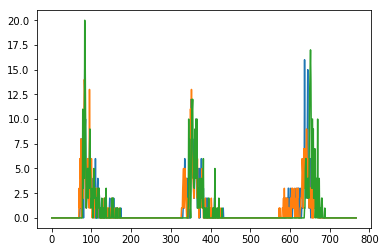

In [310]:
plt.plot(ends[0].crop((0, 0, 10, 20)).histogram())
plt.plot(ends[1].crop((0, 0, 10, 20)).histogram())
plt.plot(ends[2].crop((0, 0, 10, 20)).histogram())

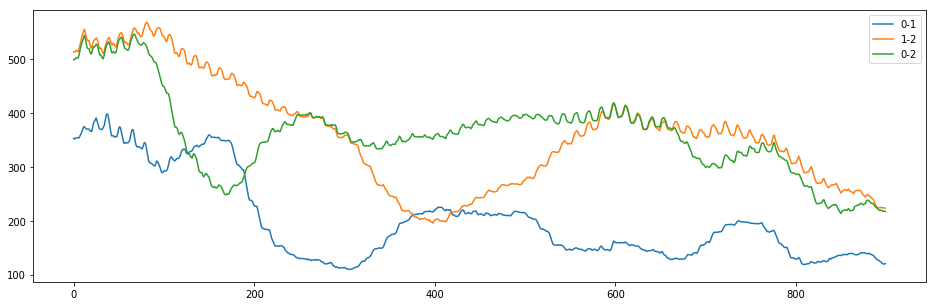

In [316]:
# plt.plot(ends[0].histogram())
plt.figure(figsize=(16, 5))
plt.plot(get_diff(ends[0], ends[1]))
plt.plot(get_diff(ends[1], ends[2]))
plt.plot(get_diff(ends[0], ends[2]))
plt.legend(['0-1', '1-2', '0-2'])

In [41]:
def generate_transform(img, radius, count):
    w, h = img.size
    box = geometry.box(0, 0, w, h)
    x, y = w/2, h/2
    center = geometry.Point([x,y])
    innerPoint = geometry.Point([x,y+radius[0]])
    outerPoint = geometry.Point([x,y+radius[1]])
    step = 360 / count
    boxes = []
    quads = []
    
    res_w = 500
    res_h = 20
#     res_w = int(radius[0] * 2 * np.pi)
#     res_h = radius[1] - radius[0]
    res_step = res_w / count
    box = np.array([0, 0, res_step, res_h])
    
    for i in range(count):
        coords = []
        coords.append([outerPoint.x, outerPoint.y])
        coords.append([innerPoint.x, innerPoint.y])

        innerPoint = affinity.rotate(innerPoint, angle=step, origin=center)
        outerPoint = affinity.rotate(outerPoint, angle=step, origin=center)

        coords.append([innerPoint.x, innerPoint.y])
        coords.append([outerPoint.x, outerPoint.y])
        
#         area = geometry.Polygon(coords)
#         print(i)
#         display(geometry.GeometryCollection([box, center, area]))
        
        quad = np.array(coords).reshape((8,1))
        
        quads.append(quad)
#         print(quad)
        
        boxes.append(tuple(box.astype('int')))
        box += np.array([res_step, 0, res_step, 0])
    result = img.transform((res_w, res_h), PIL.Image.MESH, zip(boxes, quads))
#     display(result)
    return result


def parse_img(name, count=36):
    img = PIL.Image.open(name)
#     print(img.size)

    center = np.array(img.size) / 2
    x, y = center
    x -= 1
    y -= 10
    dx = dy = 180
    bbox = [x-dx, y-dy, x+dx, y+dy]
    img = img.crop(bbox)
    
    result = generate_transform(img, [100, 180], count)
#     result = result.crop((0, 20, 1000, 40))
    display(result)
    return result

In [79]:
def find_peaks(data, threshold):
    peaks = []
    sub_threshold = threshold / 40
    for i in range(len(data) // 2, len(data)-1):
        value = float(data[i])
        dleft = value - data[i-1]
        dright = value - data[i+1]
        if value > threshold and dleft > sub_threshold and dright > sub_threshold:
#             print("find {} > {} at {}: -left={}, -right={}".format(data[i], threshold, i, data[i] - data[i-1], data[i] - data[i+1]))
            peaks.append(i)
#     return peaks
    if len(peaks) == 5 or len(peaks) == 2:
        return peaks
    elif len(peaks) < 2:
        return find_peaks(data, threshold * 0.8)
    else: # [2,5), or (5, )
        return find_peaks(data, threshold * 1.1)
    
    
def search_target(img):
    img_data = np.array(cur.rotate(-90, expand=True))
    hist = []
    h = img.size[1] // 2
    edge = int(img.size[1] * 0.3)
    for i in range(len(img_data) // 2, len(img_data)):
        if img_data[i][edge:-edge].mean() > 220 and img_data[i][:edge].mean() < 200:
            print("HighLight At", i, img_data[i][edge:-edge].mean())
            return i
            
    for i in range(len(img_data) // 2):
        hist.append(0)
    for i in range(len(img_data) // 2, len(img_data)):
        row = img_data[i]
        for j in range(len(row)):
            if np.abs(h - j) * 2 > h:
                weight = 1
            else: 
                weight = 0.5
            row[j] = weight * row[j] / (1+row[j].std())
        hist.append(np.sum(row))
    display(PIL.Image.fromarray(img_data).rotate(90, expand=True))
    peaks = find_peaks(hist, threshold = np.max(hist) / 2)
    plt.figure(figsize=(16,8))
    plt.plot(hist)
    plt.plot(peaks, [hist[i] for i in peaks])
    plt.show()
    return np.mean(peaks) if len(peaks) == 2 else peaks[3]

In [82]:
name = 'sc.png'
cur = parse_img(os.path.join(base, name))
target = search_target(cur)
line = PIL.Image.new('RGB', (1, cur.size[1]), '#FFFFFF')
tmp = cur.copy()
tmp.paste(line, (int(target), 0))
display(tmp)
print(target)

HighLight At 465 230.54166666666666


465


In [92]:
img_data = np.array(cur.rotate(-90, expand=True))

ledge = int(cur.size[1] * 0.3)
redge = int(cur.size[1] * 0.2)
print(ledge, redge)
for i in range(len(img_data)):
    if img_data[i][ledge:-redge].mean() > 220:
        print("HighLight At", i, img_data[i][ledge:-redge].mean())
        print("Left:", i, img_data[i][:ledge].mean())
        print("Right:", i, img_data[i][-redge:].mean())
img_data[465]

6 4
HighLight At 465 232.23333333333332
Left: 465 86.05555555555556
Right: 465 95.58333333333333


array([[ 79, 123, 184],
       [ 71, 110, 168],
       [ 58,  85, 128],
       [ 50,  71, 108],
       [ 22,  31,  45],
       [ 52,  65,  99],
       [238, 234, 238],
       [217, 217, 217],
       [244, 244, 244],
       [255, 255, 255],
       [213, 212, 213],
       [239, 239, 239],
       [247, 251, 247],
       [191, 193, 191],
       [223, 223, 223],
       [255, 255, 255],
       [ 92, 104, 118],
       [162, 176, 204],
       [ 35,  41,  49],
       [ 48,  51,  67]], dtype=uint8)

In [58]:
edge = (img.size[1] * 0.3)
edge

108.0

In [60]:
img.size

(360, 360)

sc.png


HighLight At 465 230.54166666666666



sc2.png


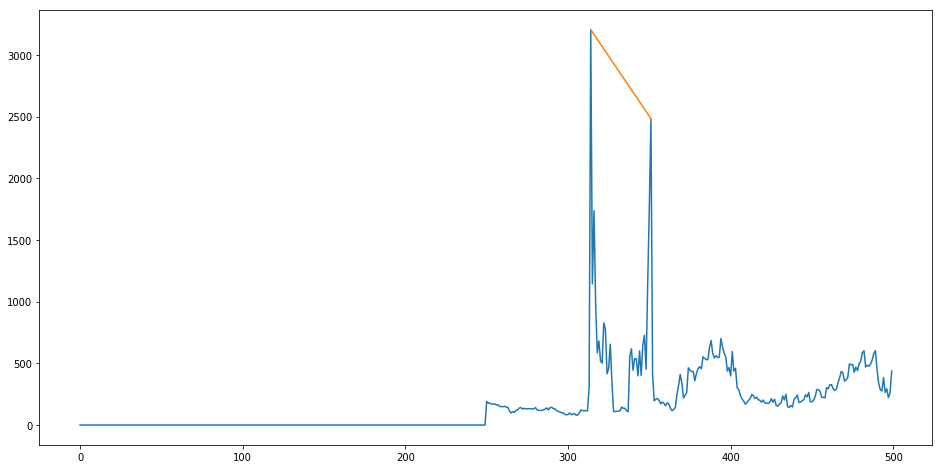


sc3.png


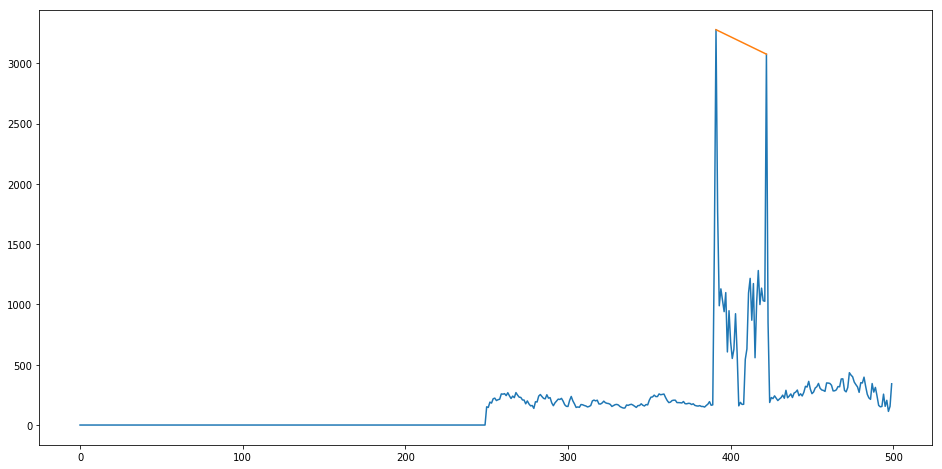


sc4.png


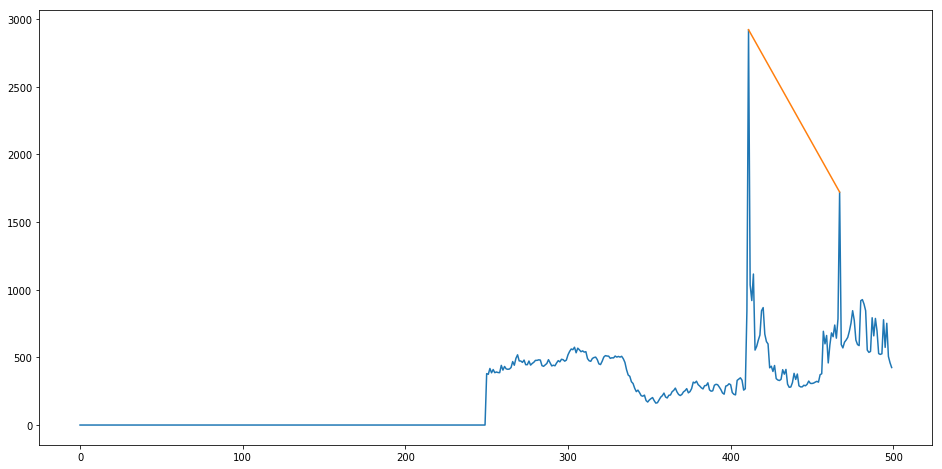


sc5.png


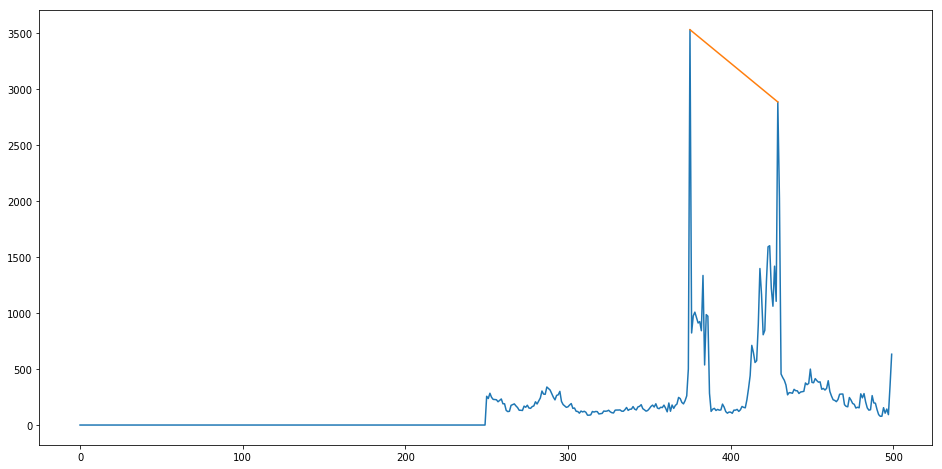


sc6.png


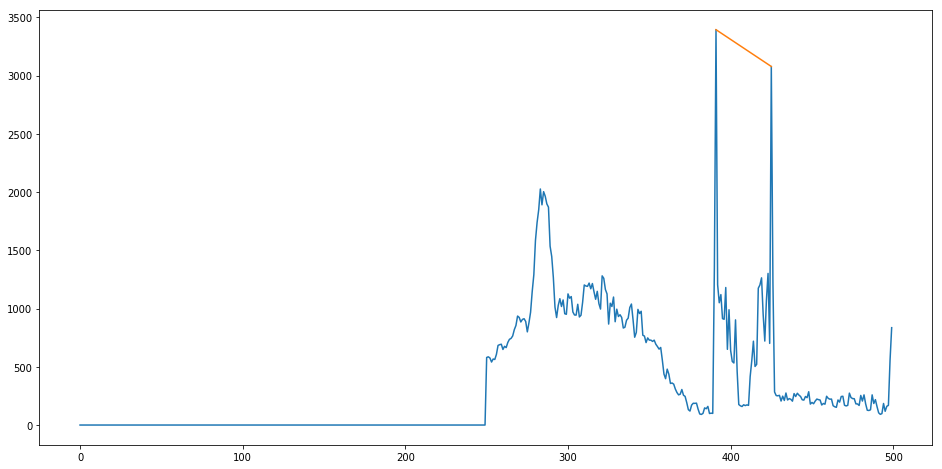


start.png


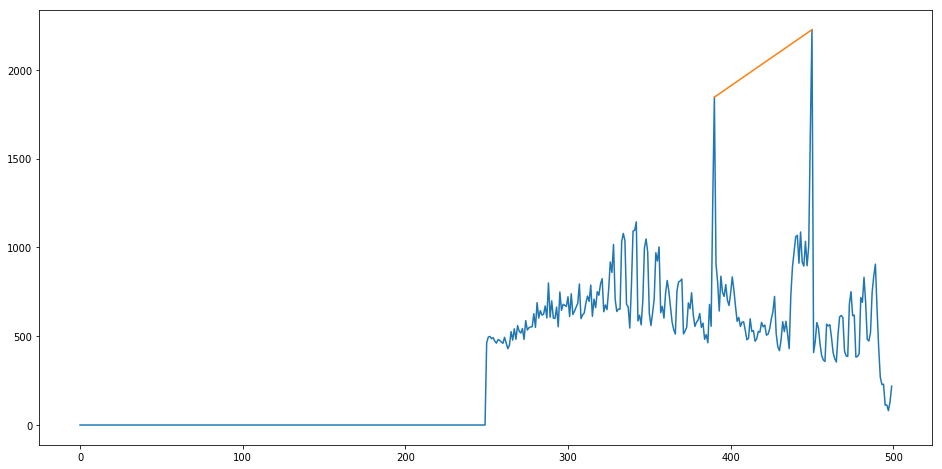


start2.png


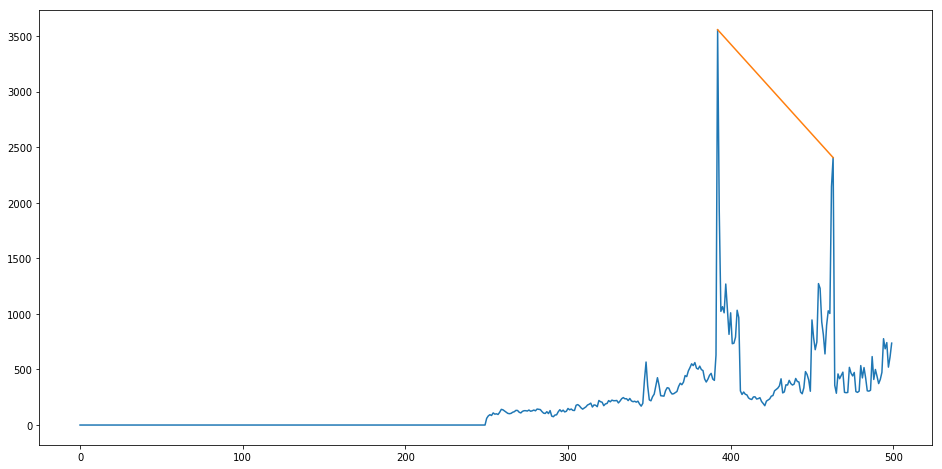


start3.png


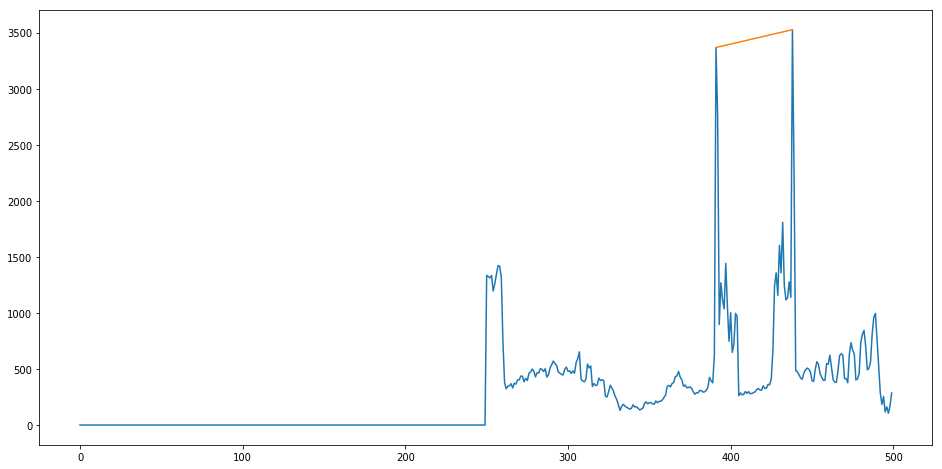

In [94]:
base = 'image_based'
for name in os.listdir(base):
    if not name.endswith('.png') or name.startswith('end'):
        continue
    print(name)
    cur = parse_img(os.path.join(base, name))
    target = search_target(cur)
    line = PIL.Image.new('RGB', (1, cur.size[1]), '#FFFFFF')
    tmp = cur.copy()
    tmp.paste(line, (int(target), 0))
    display(tmp)
    print()

In [410]:
img_data = np.array(cur.rotate(-90, expand=True))
for row in img_data:
    for i in range(len(row)):
        row[i] = row[i] / (1+row[i].std())

In [411]:
display(PIL.Image.fromarray(img_data).rotate(90, expand=True))

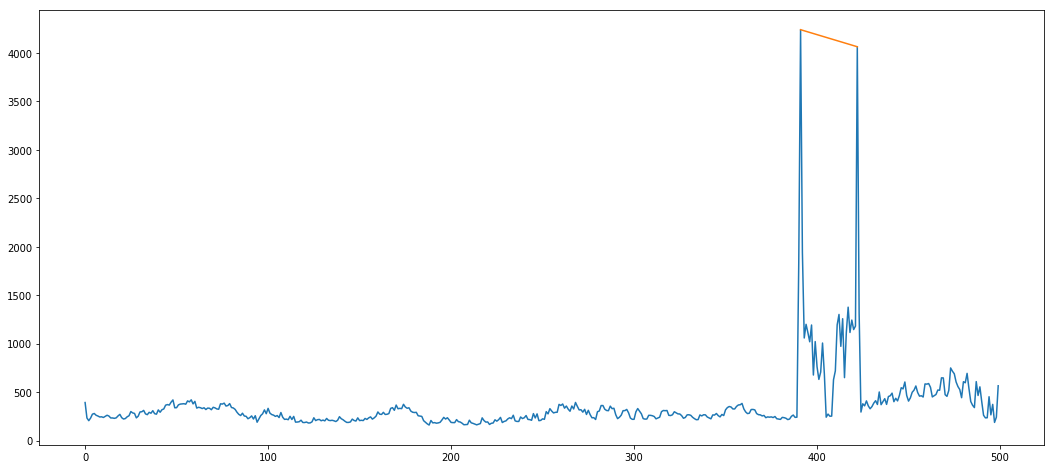

In [412]:
plt.figure(figsize=(18, 8))
plt.plot(hist)
plt.plot(x, y)

In [386]:

threshold = 4000
x = []
y = []
for i in range(1, len(hist)-1):
    if hist[i] >= threshold and hist[i] >= hist[i-1] and hist[i] >= hist[i+1]:
        x.append(i)
        y.append(hist[i])


In [382]:
y = hist
threshold = 4000
maxi = np.where(np.where([(y - np.roll(y,1) > 0) & (y - np.roll(y,-1) > 0)],y, 0)> threshold, y, 0)[0]
print(maxi)
[i for i in range(len(maxi)) if maxi[i]]


[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

[403, 441, 459, 465, 471, 472]

In [334]:
def get_diff(a, b):
    w, h = a.size
    count = 100
    dx = 100
    box = np.array([0, 0, dx, h])
    dist = []
    for i in range(w-dx):
        lh = np.array(a.crop(box).histogram())
        rh = np.array(b.crop(box).histogram())
        box += [1, 0, 1, 0]
#         diff = sum(1 - (0 if l == r else float(abs(l - r))/max(l, r)) for l, r in zip(lh, rh))/len(lh)
        diff = np.linalg.norm(lh - rh)
        dist.append(diff)

    return dist
    

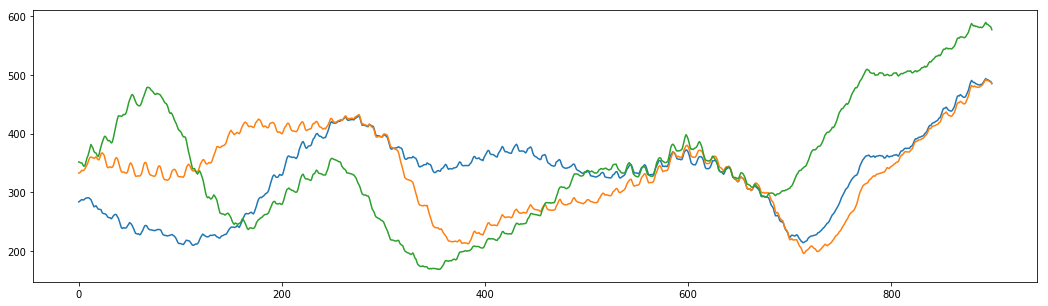

In [335]:
plt.figure(figsize=(18, 5))
for end in ends:
    plt.plot(get_diff(cur, end))

In [188]:
def generate_transform(img, radius, count):
    w, h = img.size
    box = geometry.box(0, 0, w, h)
    x, y = w/2, h/2
    center = geometry.Point([x,y])
    innerPoint = geometry.Point([x,y+radius[0]])
    outerPoint = geometry.Point([x,y+radius[1]])
    step = 360 / count
    boxes = []
    quads = []
    
    res_w = 1000
    res_h = 60
#     res_w = int(radius[0] * 2 * np.pi)
#     res_h = radius[1] - radius[0]
    res_step = res_w / count
    box = np.array([0, 0, res_step, res_h])
    
    for i in range(count):
        coords = []
        coords.append([outerPoint.x, outerPoint.y])
        coords.append([innerPoint.x, innerPoint.y])

        innerPoint = affinity.rotate(innerPoint, angle=step, origin=center)
        outerPoint = affinity.rotate(outerPoint, angle=step, origin=center)

        coords.append([innerPoint.x, innerPoint.y])
        coords.append([outerPoint.x, outerPoint.y])
        
#         area = geometry.Polygon(coords)
#         print(i)
#         display(geometry.GeometryCollection([box, center, area]))
        
        quad = np.array(coords).reshape((8,1))
        
        quads.append(quad)
#         print(quad)
        
        boxes.append(tuple(box.astype('int')))
        box += np.array([res_step, 0, res_step, 0])
    result = img.transform((res_w, res_h), PIL.Image.MESH, zip(boxes, quads))
#     display(result)
    return result

result = generate_transform(img, [100, 180], 36)

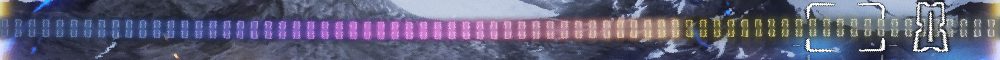

In [189]:
result

In [190]:
result.crop((0, 20, 1000, 40))

In [223]:
data = np.array(result.rotate(-90, expand=True))
for row in data:
    print(row)
    break

[[217 212 232]
 [218 215 239]
 [218 214 237]
 [219 218 245]
 [218 219 248]
 [219 223 251]
 [220 224 252]
 [216 219 247]
 [219 223 251]
 [218 223 251]
 [221 227 254]
 [219 222 250]
 [217 219 247]
 [222 225 252]
 [220 226 252]
 [217 222 249]
 [218 220 248]
 [209 209 233]
 [205 205 230]
 [190 190 215]
 [159 161 185]
 [142 144 160]
 [125 129 136]
 [102 110 128]
 [ 95 104 127]
 [ 91 103 130]
 [ 87 101 128]
 [ 86  99 128]
 [ 87 101 128]
 [ 92 102 127]
 [ 93 102 126]
 [ 93 101 126]
 [ 93 101 126]
 [ 91 101 125]
 [ 92 102 126]
 [ 91 102 126]
 [ 91 102 126]
 [ 93 103 127]
 [ 96 106 126]
 [ 99 108 122]
 [108 116 122]
 [132 134 127]
 [149 149 133]
 [167 166 142]
 [195 189 150]
 [206 198 155]
 [212 204 155]
 [218 209 156]
 [217 209 155]
 [219 211 157]
 [221 212 157]
 [219 210 155]
 [222 213 159]
 [217 208 155]
 [222 213 160]
 [220 211 158]
 [219 210 158]
 [222 213 163]
 [230 227 217]
 [230 228 221]]


In [226]:
def symmetry(row):
    center = len(row) // 2
    x = []
    y = []
    for i in range(1, center):
        a = row[center+i]
        b = row[center-i]
        dist = np.linalg.norm(a-b) + 1
        x.append(i)
        y.append(dist)
    return x,y

def get_mean(row):
    center = len(row) // 2
    weight = []
    for i in range(1, center):
        a = row[center+i]
        b = row[center-i]
        dist = np.linalg.norm(a-b) + 1
        weight.append(dist)
    weight = list(reversed(weight)) + weight
    row * weight
    row.mean()
    return x,y

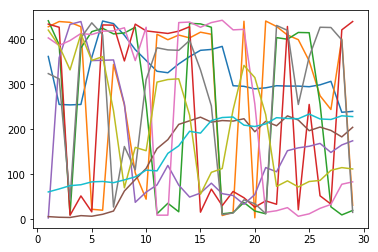

In [227]:
for i in range(0, 1000, 100):
    x, y = symmetry(data[i])
    plt.plot(x, y)
#     plt.show()

In [231]:
(row * row).mean(axis=0)

array([131.01666667, 116.25      ,  71.75      ])

In [261]:
def indicator(row):
    rgb = row.mean(axis=0)
    red = rgb[0] - rgb[2]
    return np.array([1,1,1]) * red

mean_img = []
for row in data:
    mean_img.append(indicator(row))
#     mean_img.append(row.mean(axis=0))
arr = np.array(mean_img)
# arr = (255 * arr / arr.max()).astype('uint8')
arr = (255 * (arr - arr.min()) / (arr.max() - arr.min())).astype('uint8')
print(arr)
arr = arr.reshape(1000, 1, 3)
PIL.Image.fromarray(arr).rotate(90, expand=True)

[[165 165 165]
 [155 155 155]
 [161 161 161]
 ...
 [228 228 228]
 [225 225 225]
 [174 174 174]]


In [150]:
count = 18
x, y = 180, 180
center = geometry.Point([x,y])
innerPoint = geometry.Point([x,y-120])
outerPoint = geometry.Point([x,y-180])

step = -360 / count

0


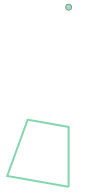

In [151]:
for i in range(count):
    coords = []
    coords.append([outerPoint.x, outerPoint.y])
    coords.append([innerPoint.x, innerPoint.y])

    innerPoint = affinity.rotate(innerPoint, angle=step, origin=center)
    outerPoint = affinity.rotate(outerPoint, angle=step, origin=center)
    
    coords.append([innerPoint.x, innerPoint.y])
    coords.append([outerPoint.x, outerPoint.y])
    # geometry.GeometryCollection([center, innerPoint, outerPoint])
    area = geometry.LinearRing(coords)
    print(i)
    display(geometry.GeometryCollection([center, area]))
    
    break

In [131]:
new_img = PIL.Image.new(size=(360, 60), mode='RGB')

In [128]:
coords

array([[ 1.80000000e+02],
       [-4.26325641e-13],
       [ 1.80000000e+02],
       [ 6.00000000e+01],
       [ 1.38957583e+02],
       [ 6.72368855e+01],
       [ 1.18436374e+02],
       [ 1.08553283e+01]])